# Harvard's Endowment

## HBS Case
### *The Harvard Management Company and Inflation-Indexed Bonds*

# 1. READING: HMC's Approach

### 1. 
There are thousands of individual risky assets in which HMC can invest.  Explain why MV optimization across 1,000 securities is infeasible.

### 2.
Rather than optimize across all securities directly, HMC runs a two-stage optimization.
1. They build asset class portfolios with each one optimized over the securities of the specific asset class.  
2. HMC combines the asset-class portfolios into one total optimized portfolio.

In order for the two-stage optimization to be a good approximation of the full MV-optimization on all assets, what must be true of the partition of securities into asset classes?

### 3.
Should TIPS form a new asset class or be grouped into one of the other 11 classes?

### 4. 
Why does HMC focus on real returns when analyzing its portfolio allocation? Is this just a matter of scaling, or does using real returns versus nominal returns potentially change the MV solution?

### 5.
The case discusses the fact that Harvard places bounds on the portfolio allocation rather than implementing whatever numbers come out of the MV optimization problem.

How might we adjust the stated optimization problem in the lecture notes to reflect the extra constraints Harvard is using in their bounded solutions given in Exhibits 5 and 6?

### 6. 
Exhibits 5 shows zero allocation to domestic equities and domestic bonds across the entire computed range of targeted returns, (5.75% to 7.25%). Conceptually, why is the constraint binding in all these cases? What would the unconstrained portfolio want to do with those allocations and why?

### 7.
Exhibit 6 changes the constraints, (tightening them in most cases.) How much deterioration do we see in the mean-variance tradeoff that Harvard achieved?

***

# 2 Mean-Variance Optimization

### Data
You will need the file in the github repo, `data/multi_asset_etf_data.xlsx`.
- The time-series data gives monthly returns for the 11 asset classes and a short-term Treasury-bill fund return, (`SHV`.)
- The case does not give time-series data, so this data has been compiled outside of the case, and it intends to represent the main asset classes under consideration via various ETFs. For details on the specific securities/indexes, check the “Info” tab of the data.

### Excess Returns
- We consider `SHV` as the risk-free asset.
- We are going to analyze the problem in terms of **excess** returns, where `SHV` has been subtracted from the other columns.
- The risk-free rate changes over time, but the assumption is that investors know it’s value one-period ahead of time. Thus, at any given point in time, it is a risk-free rate for the next period. (This is often discussed as the "bank account" or "money market account" in other settings.)

### Adjustment
For ease of analysis, drop `QAI` from the dataset. Analyze the remaining 10 assets.

### Not Considered
- These are nominal returns-they are not adjusted for inflation, and in our calculations we are not making any adjustment for inflation.
- The exhibit data that comes via Harvard with the case is unnecessary for our analysis.

### Format
In the questions below, **annualize the statistics** you report.
- Annualize the mean of monthly returns with a scaling of 12.
- Annualize the volatility of monthly returns with a scaling of $\sqrt{12}$
- Note that we are not scaling the raw timeseries data, just the statistics computed from it (mean, vol, Sharpe).

### 1. Summary Statistics
* Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)
* Which assets have the best and worst Sharpe ratios? 

Recall that the Sharpe Ratio is simply the ratio of the mean-to-volatility of excess returns:

$$\text{sharpe ratio of investment }i = \frac{\tilde{\mu}_i}{\sigma_i}$$

Be sure to annualize all three statss (mean, vol, Sharpe).


In [1]:
from unittest.mock import inplace

import matplotlib.pyplot as plt
import polars as pl
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from finm367.utils import only_numeric
from finm367.plot_tools import plot_corr, plot_bar
from finm367.portfolio import Portfolio

DATA_PATH = Path.cwd().parents[1] / 'data'
FILE_PATH = DATA_PATH / 'multi_asset_etf_data.xlsx'
FREQ = 12

data = pl.read_excel(FILE_PATH, sheet_name='excess returns')
data = data.drop("QAI")

In [2]:
data.head()

Date,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY,TIP
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2011-02-28,0.007027,0.04212,-0.000027,0.035908,0.014763,-0.001674,0.045614,0.040556,0.035147,0.007618
2011-03-31,0.008755,0.026909,0.063224,-0.023555,0.000752,-0.001218,-0.010607,0.016995,0.000448,0.012231
2011-04-30,0.04876,0.045514,0.027283,0.056214,0.015932,0.018369,0.046589,0.058627,0.028917,0.023735
2011-05-31,-0.012945,-0.051124,-0.0288,-0.021461,0.001933,0.025654,0.010733,-0.040965,-0.010615,0.003259
2011-06-30,0.00023,-0.042318,-0.009027,-0.011781,-0.005378,-0.004716,-0.030733,-0.042254,-0.016542,0.007876


In [3]:
rets = only_numeric(data)
mu = rets.mean() * FREQ
vol = rets.std() * np.sqrt(FREQ)
sharpe = mu / vol

In [4]:
mu

BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY,TIP
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
-0.007716,-0.005292,0.029339,0.061775,0.041371,0.016404,0.074916,0.092561,0.128141,0.020502


In [5]:
vol

BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY,TIP
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.082789,0.166553,0.176164,0.150903,0.075928,0.063442,0.168675,0.21337,0.142839,0.051115


In [6]:
sharpe

BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY,TIP
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
-0.093202,-0.031774,0.166542,0.409372,0.544873,0.258569,0.444143,0.433804,0.897103,0.401091


### 2. Descriptive Analysis
* Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?
* How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?


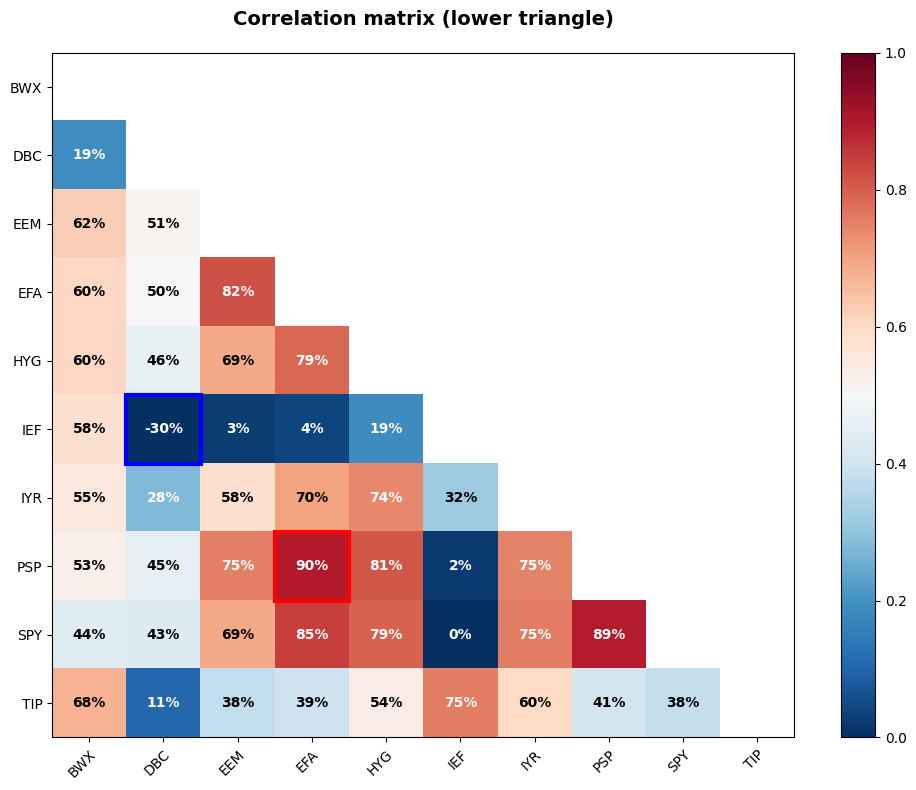

In [7]:
corr_df = rets.corr()
fig, _ = plot_corr(corr_df, labels=corr_df.columns)
plt.show()

### 3. The MV frontier.
* Compute and display the weights of the tangency portfolios: $\text{w}^{\text{tan}}$.
* Does the ranking of weights align with the ranking of Sharpe ratios?
* Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to
$\text{w}^{\text{tan}}$.


In [8]:
p = Portfolio(rets)
w_tan = p.mv_weights()
w_tan

BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY,TIP
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
-0.850643,-0.071623,0.026437,0.068682,0.290614,0.881186,-0.246582,-0.332995,1.059632,0.175293


In [9]:
solution_cols = ["SPY", "EFA", "EEM", "PSP", "HYG", "DBC", "IYR", "IEF", "BWX", "TIP"]
w_tan_solution = w_tan.select(solution_cols)
w_tan_solution

SPY,EFA,EEM,PSP,HYG,DBC,IYR,IEF,BWX,TIP
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.059632,0.068682,0.026437,-0.332995,0.290614,-0.071623,-0.246582,0.881186,-0.850643,0.175293


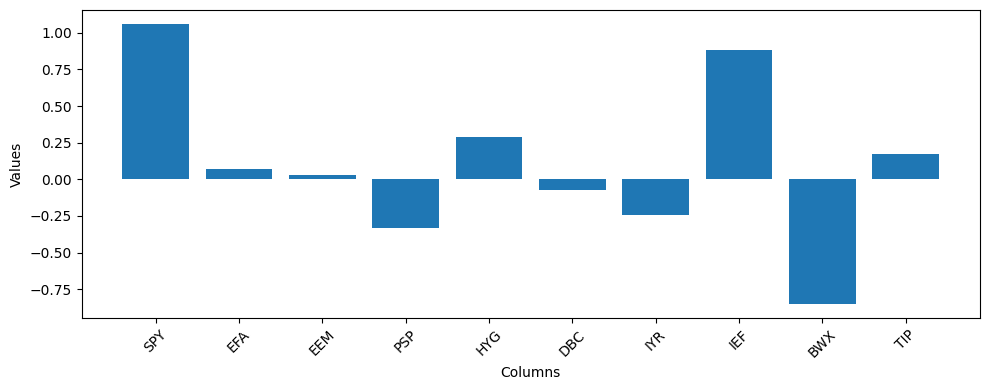

In [10]:
plot_bar(w_tan_solution)

Compare rankings

No, the weights do not align.

In [11]:
p_rets = pl.DataFrame([rets[col] * w_tan[col] for col in rets.columns])

In [12]:
p_mean = p_rets.mean() * FREQ
p_vol = p_rets.std() * np.sqrt(FREQ)
p_sharpe = p_mean / p_vol

In [13]:
p_mean

BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY,TIP
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.006564,0.000379,0.000776,0.004243,0.012023,0.014455,-0.018473,-0.030822,0.135783,0.003594


In [14]:
p_vol

BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY,TIP
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.070424,0.011929,0.004657,0.010364,0.022066,0.055904,0.041592,0.071051,0.151357,0.00896


In [15]:
p_sharpe

BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY,TIP
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.093202,0.031774,0.166542,0.409372,0.544873,0.258569,-0.444143,-0.433804,0.897103,0.401091



### 4. TIPS
Assess how much the tangency portfolio (and performance) change if...
* TIPS are dropped completely from the investment set.
* The expected excess return to TIPS is adjusted to be 0.0012 higher than what the historic sample shows.

Based on the analysis, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

### Why TIPS Have Minimal Impact Initially

**"Dropping TIPS from the investment set barely impacts the weights or the resulting performance."**

This suggests that in the base case analysis, TIPS appear redundant because:
- Their return/risk profile is similar enough to nominal bonds that the optimizer doesn't see them as offering meaningful diversification
- The mean-variance optimizer is treating them as essentially interchangeable with regular bonds
- Their correlation with nominal bonds is high enough that they don't create a distinct opportunity

### Why Small Adjustments Matter Greatly

**"Adjusting the mean of TIPS upward even just 1 standard error substantially impacts the allocations..."**

This reveals a key issue with mean-variance optimization:
- **Estimation sensitivity**: The optimal allocation is highly sensitive to the expected return assumption
- **Standard error matters**: A modest adjustment (1 SE) represents reasonable uncertainty in the estimate, yet it dramatically changes the solution
- **Instability concern**: If small, statistically plausible changes in inputs create large allocation shifts, the optimization may be unreliable

### The Central Dilemma

The author is highlighting that **the decision depends on your modeling philosophy**:

**Case for keeping TIPS separate:**
- They offer genuine diversification through inflation protection (different risk factor)
- The diversification benefit (TIPS vs bonds) exceeds that between some equity categories already in the portfolio (e.g., various SPY-like holdings)
- They represent a distinct economic exposure

**Case for combining with bonds:**
- Practically, they mostly substitute for domestic bonds in the allocation
- The mean-variance framework doesn't capture their unique inflation-hedging benefit well
- Treating them as a bond subcategory simplifies the model without major performance loss

### The Deeper Insight

This reasoning exposes a limitation of pure mean-variance analysis: **it may not adequately capture qualitative differences** between asset classes. TIPS's value comes from inflation protection, which is a regime-dependent benefit that historical mean returns and covariances may not fully reflect. The author is essentially saying the quantitative analysis is inconclusive, so judgment about the nature of TIPS as an asset class should guide the decision.

***

# 3. Allocations


* Continue with the same data file as the previous section.

* Suppose the investor has a targeted mean excess return (per month) of $\tilde{\mu}^{\text{port}}$ = 0.01.

Build the following portfolios:

#### Equally-weighted (EW)
Rescale the entire weighting vector to have target mean $\tilde{\mu}^{\text{port}}$. Thus, the $i$ element of the weight vector is,

$$w^{\text{EW}}_i = \frac{1}{n}$$

#### “Risk-parity” (RP)
Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample variance estimate. Thus, the $i$ element of the weight vector is,

$$w^{\text{RP}}_i = \frac{1}{\sigma_i^2}$$

#### Mean-Variance (MV)
As described in `Section 2`.

### Comparing

In order to compare all these allocation methods, rescale each weight vector, such that it has targeted mean return of $\tilde{\mu}^{\text{port}}$.

* Calculate the performance of each of these portfolios over the sample.
* Report their mean, volatility, and Sharpe ratio. 
* How does performance compare across allocation methods?

In [16]:
w = Portfolio(rets)
w_eq = w.equal_weights()
w_rp = w.rp_weights()
w_mv = w.mv_weights()

In [17]:
p_eq = w.get_returns("eq")

In [18]:
p_rp = w.get_returns("rp")
p_rp_mean = p_rp.mean() * FREQ
p_rp_vol = p_rp.std() * np.sqrt(FREQ)
p_rp_sharpe = p_rp_mean / p_rp_vol

In [20]:
p_rp_mean

0.027708203059167588

In [19]:
p_mv = w.get_returns("mv")

***

# 4. EXTRA: Out-of-Sample Performance

### 1. One-step Out-of-Sample (OOS) Performance
Let’s divide the sample to both compute a portfolio and then check its performance out of sample.
* Using only data through the end of `2023`, compute the weights built in Section 3.
* Rescale the weights, (using just the in-sample data,) to set each allocation to have the same mean return of $\tilde{\mu}^{\text{port}}$.
* Using those weights, calculate the portfolio’s Sharpe ratio within that sample.
* Again using those weights, (derived using data through `2023`,) calculate the portfolio’s OOS Sharpe ratio, which is based only on performance in `2024-2025`.

### 2. Rolling OOS Performance

Iterate the Out-of-Sample performance every year, not just the final year. Namely,
* Start at the end of `2015`, and calculate the weights through that time. Rescale them using the mean returns through that time.
* Apply the weights to the returns in the upcoming year, (`2016`.)
* Step forward a year in time, and recompute.
* Continue until again calculating the weights through `2023` and applying them to the returns in `2024-2025`.

Report the mean, volatility, and Sharpe from this dynamic approach for the following portfolios:
* mean-variance (tangency)
* equally-weighted
* risk-parity
* regularized

***

# 5. EXTRA: Without a Riskless Asset

Re-do Section 2 above, but in the model without a risk-free rate.

That is, build the MV allocation using the two-part formula in the `Mean-Variance` section of the notes.
* This essentially substitutes the risk-free rate with the minimum-variance portfolio.
* Now, the allocation depends nonlinearly on the target mean return, $\tilde{\mu}^{\text{port}}$. (With a risk-free rate, we simply scale the weights up and down to achieve the mean return.)

You will find that, conceptually, the answers are very similar.

***

# 6. EXTRA: Bayesian Allocation

Add the following allocation among the choices in `Section 3`...

#### Regularized (REG)
Much like the Mean-Variance portfolio, set the weights proportional to 

$$w^{\text{REG}} \sim \widehat{\Sigma}^{-1}\mux$$

but this time, use a regularized covariance matrix,

$$\widehat{\Sigma} = \frac{\Sigma + \Sigma_D}{2}$$

where $\Sigma_D$ denotes a *diagonal* matrix of the security variances, with zeros in the off-diagonals.

Thus, $\widehat{\Sigma}$ is obtained from the usual covariance matrix, $\Sigma$, but shrinking all the covariances to half their estimated values.

# 7. EXTRA: Inefficient Tangency

Return to analyzing the excess returns, as in `Section 3`. Include the hedge-fund ETF, QAI.

You might find that the tangency portfolio has a negative mean return. 
- It is on the inefficient portion of the MV frontier.

Calculate the optimal allocation by shorting the tangency portfolio. (That is, multiply the tangency weights by negative one to determine the allocation weights.)

Re-do the analysis of Section 3. Does the addition of `QAI` change much.